# Работа с грязными данными

In [22]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Для дальнейшего анализа необходимо собрать все данные в один датафрейм

In [5]:
# Метод Python os.walk() генерирует имена файлов в дереве каталогов, проходя по дереву сверху вниз или снизу вверх.
tree = os.walk('data')

for item in tree:
    # path, folders, files
    print(item)

('data', ['2020-12-06', '2020-12-08', '2020-12-09', '2020-12-07', '2020-12-05', '2020-12-03', '2020-12-04'], [])
('data/2020-12-06', ['Vasiliy_Fedorov'], [])
('data/2020-12-06/Vasiliy_Fedorov', [], ['data.csv'])
('data/2020-12-08', ['Alexey_Fedorov', 'Anton_Smirnov', 'Kirill_Smirnov', 'Rostislav_Petrov', 'Petr_Petrov'], [])
('data/2020-12-08/Alexey_Fedorov', [], ['data.csv'])
('data/2020-12-08/Anton_Smirnov', [], ['data.csv'])
('data/2020-12-08/Kirill_Smirnov', [], ['data.csv'])
('data/2020-12-08/Rostislav_Petrov', [], ['data.csv'])
('data/2020-12-08/Petr_Petrov', [], ['data.csv'])
('data/2020-12-09', ['Anton_Ivanov', 'Anton_Smirnov', 'Rostislav_Petrov', 'Petr_Fedorov', 'Alexey_Smirnov', 'Anton_Petrov', 'Vasiliy_Ivanov'], [])
('data/2020-12-09/Anton_Ivanov', [], ['data.csv'])
('data/2020-12-09/Anton_Smirnov', [], ['data.csv'])
('data/2020-12-09/Rostislav_Petrov', [], ['data.csv'])
('data/2020-12-09/Petr_Fedorov', [], ['data.csv'])
('data/2020-12-09/Alexey_Smirnov', [], ['data.csv'])
('

In [6]:
tree = os.walk('data')
data_files = []
target_file = 'data.csv' # название конечного узла

for item in tree:
    files = item[-1]
    if len(files) > 0 and target_file in files:
        path = os.path.join(item[0], target_file)
        data_files.append(path)

In [7]:
data_files

['data/2020-12-06/Vasiliy_Fedorov/data.csv',
 'data/2020-12-08/Alexey_Fedorov/data.csv',
 'data/2020-12-08/Anton_Smirnov/data.csv',
 'data/2020-12-08/Kirill_Smirnov/data.csv',
 'data/2020-12-08/Rostislav_Petrov/data.csv',
 'data/2020-12-08/Petr_Petrov/data.csv',
 'data/2020-12-09/Anton_Ivanov/data.csv',
 'data/2020-12-09/Anton_Smirnov/data.csv',
 'data/2020-12-09/Rostislav_Petrov/data.csv',
 'data/2020-12-09/Petr_Fedorov/data.csv',
 'data/2020-12-09/Alexey_Smirnov/data.csv',
 'data/2020-12-09/Anton_Petrov/data.csv',
 'data/2020-12-09/Vasiliy_Ivanov/data.csv',
 'data/2020-12-07/Petr_Smirnov/data.csv',
 'data/2020-12-07/Anton_Ivanov/data.csv',
 'data/2020-12-07/Rostislav_Fedorov/data.csv',
 'data/2020-12-07/Alexey_Fedorov/data.csv',
 'data/2020-12-07/Anton_Smirnov/data.csv',
 'data/2020-12-07/Petr_Fedorov/data.csv',
 'data/2020-12-07/Alexey_Smirnov/data.csv',
 'data/2020-12-07/Vasiliy_Ivanov/data.csv',
 'data/2020-12-07/Kirill_Fedorov/data.csv',
 'data/2020-12-07/Alexey_Ivanov/data.csv',

In [8]:
data_files_df = []

for path in data_files:
    # в файлах data.csv отдельно обозначется индекс строки
    df = pd.read_csv(path, index_col = 0)
    date, name = path.split('/')[1:3]
    df['name'] = name
    df['date'] = date
    data_files_df.append(df)

In [9]:
data_files_df

[   product_id  quantity             name        date
 0          56         4  Vasiliy_Fedorov  2020-12-06
 1          97         3  Vasiliy_Fedorov  2020-12-06
 2          79         3  Vasiliy_Fedorov  2020-12-06
 3          29         5  Vasiliy_Fedorov  2020-12-06,
    product_id  quantity            name        date
 0          73         5  Alexey_Fedorov  2020-12-08
 1          34         1  Alexey_Fedorov  2020-12-08
 2          71         1  Alexey_Fedorov  2020-12-08
 3          18         2  Alexey_Fedorov  2020-12-08
 4          67         2  Alexey_Fedorov  2020-12-08,
    product_id  quantity           name        date
 0           6         5  Anton_Smirnov  2020-12-08
 1          34         5  Anton_Smirnov  2020-12-08
 2          18         1  Anton_Smirnov  2020-12-08
 3          28         4  Anton_Smirnov  2020-12-08
 4          40         1  Anton_Smirnov  2020-12-08
 5          17         3  Anton_Smirnov  2020-12-08,
    product_id  quantity            name     

In [10]:
data = pd.concat(data_files_df, ignore_index=True)

In [11]:
data

,product_id,quantity,name,date
0,56,4,Vasiliy_Fedorov,2020-12-06
1,97,3,Vasiliy_Fedorov,2020-12-06
2,79,3,Vasiliy_Fedorov,2020-12-06
3,29,5,Vasiliy_Fedorov,2020-12-06
4,73,5,Alexey_Fedorov,2020-12-08
...,...,...,...,...
156,3,4,Kirill_Fedorov,2020-12-04
157,89,5,Kirill_Fedorov,2020-12-04
158,75,2,Kirill_Fedorov,2020-12-04
159,41,5,Kirill_Fedorov,2020-12-04


### После получения итогового датафрейма data, можно проанализировать следующие параметры

### Выяснить, какой пользователь купил больше всего товаров.

In [21]:
qnt_bought = data.groupby('name', as_index = False).quantity.sum()
qnt_bought.sort_values('quantity', ascending = False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


### Найти топ-10 товаров по числу проданных единиц за всё время и построить барплот, где:

#### – по оси x – идентификаторы товаров (product_id)

#### – по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

In [26]:
products = data.groupby('product_id', as_index = False).quantity.sum()

In [27]:
top10_products = products.sort_values('quantity', ascending = False).head(10)

Text(0.5, 1.0, 'Топ-10 товаров')

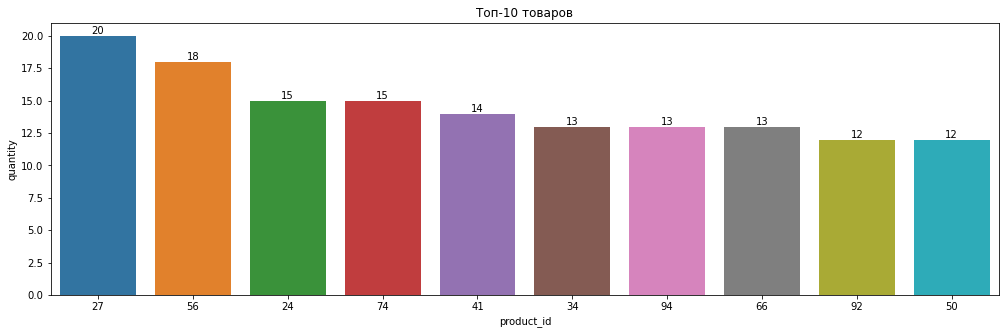

In [40]:
# Устанавливаю размер графика
fig, ax = plt.subplots(figsize=(17, 5))

sns.barplot(data = top10_products, 
            x='product_id', 
            y='quantity', 
            order=top10_products.sort_values('quantity', ascending=False).product_id)

ax.bar_label(ax.containers[0])
ax.set_title('Топ-10 товаров')

### Также можно посмотреть на продажи по дням

In [33]:
date = data.groupby('date', as_index = False).quantity.sum()

Text(0.5, 1.0, 'Продажи по дням')

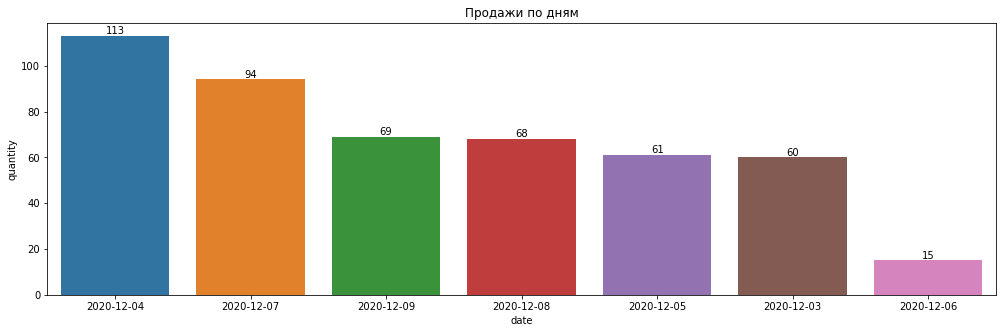

In [39]:
fig, ax = plt.subplots(figsize=(17, 5))

sns.barplot(data = date, 
            x='date', 
            y='quantity', 
            order=date.sort_values('quantity', ascending=False).date)

ax.bar_label(ax.containers[0])
ax.set_title('Продажи по дням')